### EXCERCISE 11.1

This excercise is needed just to take confidential wirh NN and the goal is to optimize the code given at the excercisation.

The problem consists to fit in the best way possible the function
$$
f(x)=2x+1 + \eta
$$where $\eta$ is an error normal distributed around the training set.

The parameter of the code given are $NTrain=100$, $NValid=10$ and $NEpcoch=30$. Using these parameter and a training set with $\eta=0.5$, it has been obtained an angolar coefficient $m=0.94$ and an intersect $b=0.88$, very far from the values it was wanted to obtain.

In the following code have been changed the parameters to see what happen.

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [3]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

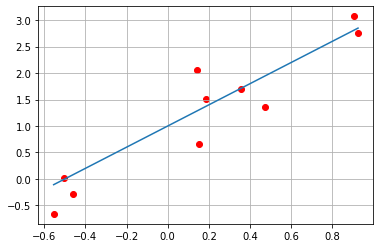

In [4]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [5]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [6]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=150,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/150
4/4 [==============================] - 0s 63ms/step - loss: 3.7447 - mse: 3.7447 - val_loss: 3.9924 - val_mse: 3.9924
Epoch 2/150
4/4 [==============================] - 0s 11ms/step - loss: 3.5543 - mse: 3.5543 - val_loss: 3.6631 - val_mse: 3.6631
Epoch 3/150
4/4 [==============================] - 0s 11ms/step - loss: 3.3064 - mse: 3.3064 - val_loss: 3.3290 - val_mse: 3.3290
Epoch 4/150
4/4 [==============================] - 0s 11ms/step - loss: 3.0532 - mse: 3.0532 - val_loss: 3.0952 - val_mse: 3.0952
Epoch 5/150
4/4 [==============================] - 0s 10ms/step - loss: 2.8694 - mse: 2.8694 - val_loss: 2.8527 - val_mse: 2.8527
Epoch 6/150
4/4 [==============================] - 0s 12ms/step - loss: 2.6751 - mse: 2.6751 - val_loss: 2.6277 - val_mse: 2.6277
Epoch 7/150
4/4 [==============================] - 0s 10ms/step - loss: 2.5013 - mse: 2.5013 - val_loss: 2.5028 - val_mse: 2.5028
Epoch 8/150
4/4 [==============================] - 0s 10ms/step - loss: 2.3890 - mse: 2.38

4/4 [==============================] - 0s 17ms/step - loss: 0.3524 - mse: 0.3524 - val_loss: 0.2716 - val_mse: 0.2716
Epoch 64/150
4/4 [==============================] - 0s 17ms/step - loss: 0.3475 - mse: 0.3475 - val_loss: 0.2676 - val_mse: 0.2676
Epoch 65/150
4/4 [==============================] - 0s 14ms/step - loss: 0.3430 - mse: 0.3430 - val_loss: 0.2641 - val_mse: 0.2641
Epoch 66/150
4/4 [==============================] - 0s 17ms/step - loss: 0.3394 - mse: 0.3394 - val_loss: 0.2585 - val_mse: 0.2585
Epoch 67/150
4/4 [==============================] - 0s 11ms/step - loss: 0.3340 - mse: 0.3340 - val_loss: 0.2568 - val_mse: 0.2568
Epoch 68/150
4/4 [==============================] - 0s 10ms/step - loss: 0.3292 - mse: 0.3292 - val_loss: 0.2544 - val_mse: 0.2544
Epoch 69/150
4/4 [==============================] - 0s 15ms/step - loss: 0.3259 - mse: 0.3259 - val_loss: 0.2523 - val_mse: 0.2523
Epoch 70/150
4/4 [==============================] - 0s 12ms/step - loss: 0.3218 - mse: 0.3218 - 

4/4 [==============================] - 0s 13ms/step - loss: 0.2525 - mse: 0.2525 - val_loss: 0.2032 - val_mse: 0.2032
Epoch 126/150
4/4 [==============================] - 0s 15ms/step - loss: 0.2522 - mse: 0.2522 - val_loss: 0.2042 - val_mse: 0.2042
Epoch 127/150
4/4 [==============================] - 0s 16ms/step - loss: 0.2520 - mse: 0.2520 - val_loss: 0.2023 - val_mse: 0.2023
Epoch 128/150
4/4 [==============================] - 0s 15ms/step - loss: 0.2519 - mse: 0.2519 - val_loss: 0.2027 - val_mse: 0.2027
Epoch 129/150
4/4 [==============================] - 0s 17ms/step - loss: 0.2519 - mse: 0.2519 - val_loss: 0.2015 - val_mse: 0.2015
Epoch 130/150
4/4 [==============================] - 0s 17ms/step - loss: 0.2518 - mse: 0.2518 - val_loss: 0.2020 - val_mse: 0.2020
Epoch 131/150
4/4 [==============================] - 0s 18ms/step - loss: 0.2514 - mse: 0.2514 - val_loss: 0.2028 - val_mse: 0.2028
Epoch 132/150
4/4 [==============================] - 0s 15ms/step - loss: 0.2514 - mse: 0.

In [8]:
# return weights
model.get_weights()

[array([[2.0659516]], dtype=float32), array([1.0643227], dtype=float32)]

In [9]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 930us/step - loss: 0.2046 - mse: 0.2046

Test loss: 0.2045557200908661
Test accuracy: 0.2045557200908661


In [10]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 952us/step - loss: 0.0068 - mse: 0.0068

Test loss: 0.006761029362678528
Test accuracy: 0.006761029362678528


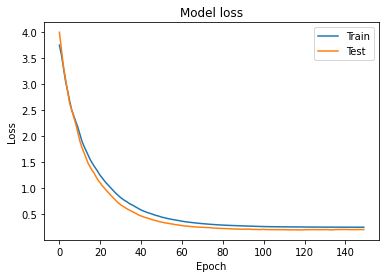

In [11]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

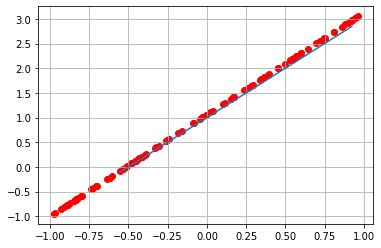

In [12]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Changing only number of training to $NTrain=1000$, the prediction becomes immediately better and it can be obtained the parameters $m$ and $b$ with a precision less than 3%.

On the other hand changing only the number on which it is made the prediction to $NValid=100$, it does not bring a lot of benefits and the estimations are obtained obtained with en error of 15%. 

Changing the number of training to $NTrain=1000$ and the number on which it is made the prediction to $NValid=100$ , it can be reduced even the learning from $NEpoch=30$ to $NEpoch=20$ and still predict the parameters $m$ and $b$ with a precision of the 2%.

If a big training set of data is not avaiable it still is possible make a prediction, but the machine needs more time to learn. Has been made a simulation with $NTrain=100$, $NValid=10$ and to get a results with an error of 5% it has been needed an $NEpoch=150$.